In [1]:
import requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:

def download_data(gnss_location: str, save_path: str = "./DATA") -> None:
    url = f"http://geodesy.unr.edu/gps_timeseries/tenv3/IGS14/{gnss_location}.tenv3"

    if not os.path.exists(save_path):
        os.makedirs(save_path)

    response = requests.get(url)
    
    if response.status_code == 200:
        file_path = f"{save_path}/{gnss_location}.tenv3"
        with open(file_path, "wb") as file:
            file.write(response.content)
        print(f"File downloaded successfully: {file_path}")
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")


In [2]:
#panda dataframe
df = pd.read_csv('midas.IGS14_1.txt', delim_whitespace= True, header=None)
#numpy array just because its easier for me
data = np.array(df)




/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_80818/2697764730.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('midas.IGS14_1.txt', delim_whitespace= True, header=None)


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,00NA,MIDAS5,2008.2355,2018.7324,10.4969,3190,2968,5171,0.036213,0.058799,...,0.072,0.116,0.072,0.002145,0.002358,0.008469,1,-12.466639,-229.156012,104.84337
1,01NA,MIDAS5,2008.2683,2019.7426,11.4743,2362,2362,3599,0.035826,0.059595,...,0.083,0.089,0.113,0.001910,0.001951,0.006980,1,-12.478223,-229.017953,105.37638
2,02NA,MIDAS5,2008.7255,2016.9993,8.2738,1913,1913,3392,0.036171,0.059940,...,0.064,0.090,0.071,0.001904,0.002059,0.007934,0,-12.355923,-229.118271,117.65070
3,0ABI,MIDAS5,2009.4428,2024.1862,14.7434,5365,5365,10003,0.015101,0.014912,...,0.081,0.073,0.059,0.002124,0.002127,0.008196,0,68.354344,-341.183556,431.36114
4,0ABY,MIDAS5,2015.2717,2024.1862,8.9145,3242,3242,5756,0.018469,0.013932,...,0.046,0.048,0.056,0.002114,0.001860,0.007450,0,58.658908,-343.820357,60.52724


In [6]:
# Specifying region (bounding box)
lat_min = 37  # Minimum latitude
lat_max = 38   # Maximum latitude
lon_min = -122  # Minimum longitude
lon_max = -121  # Maximum longitude

# Filtering data based on latitude and longitude conditions
filtered_data = data[(data[:, 24] >= lat_min) & (data[:, 24] <= lat_max) &
                             (data[:, 25] >= lon_min) & (data[:, 25] <= lon_max)]

# Extracting names from the first column for the filtered data
station_names_in_region = filtered_data[:, 0]
print(station_names_in_region.size)

#stay in pandas

# Filtering data based on latitude and longitude conditions
filtered_data_pd = df[(df[24] >= lat_min) & (df[24] <= lat_max) & (df[25] >= lon_min) & (df[25] <= lon_max)]


55


In [7]:
station_names_in_region

array(['BWOD', 'CAFT', 'CAP4', 'CAPL', 'CNDR', 'CROW', 'CSJB', 'CYTE',
       'DIAB', 'DUBP', 'LEIC', 'LIVM', 'LUTZ', 'MHC2', 'MHCB', 'MILP',
       'MONB', 'MSHP', 'MTPK', 'MTWK', 'ORE2', 'ORE3', 'OREO', 'P213',
       'P214', 'P215', 'P216', 'P217', 'P226', 'P227', 'P228', 'P229',
       'P230', 'P240', 'P241', 'P244', 'P248', 'P252', 'P253', 'P254',
       'P255', 'P256', 'P257', 'P258', 'P260', 'P781', 'RJAB', 'S300',
       'SACL', 'SEI2', 'SEIB', 'SOD2', 'SODB', 'STCK', 'THAL'],
      dtype=object)

In [8]:
#uncomment for downloading data
# for site in station_names_in_region:
#     download_data(site)

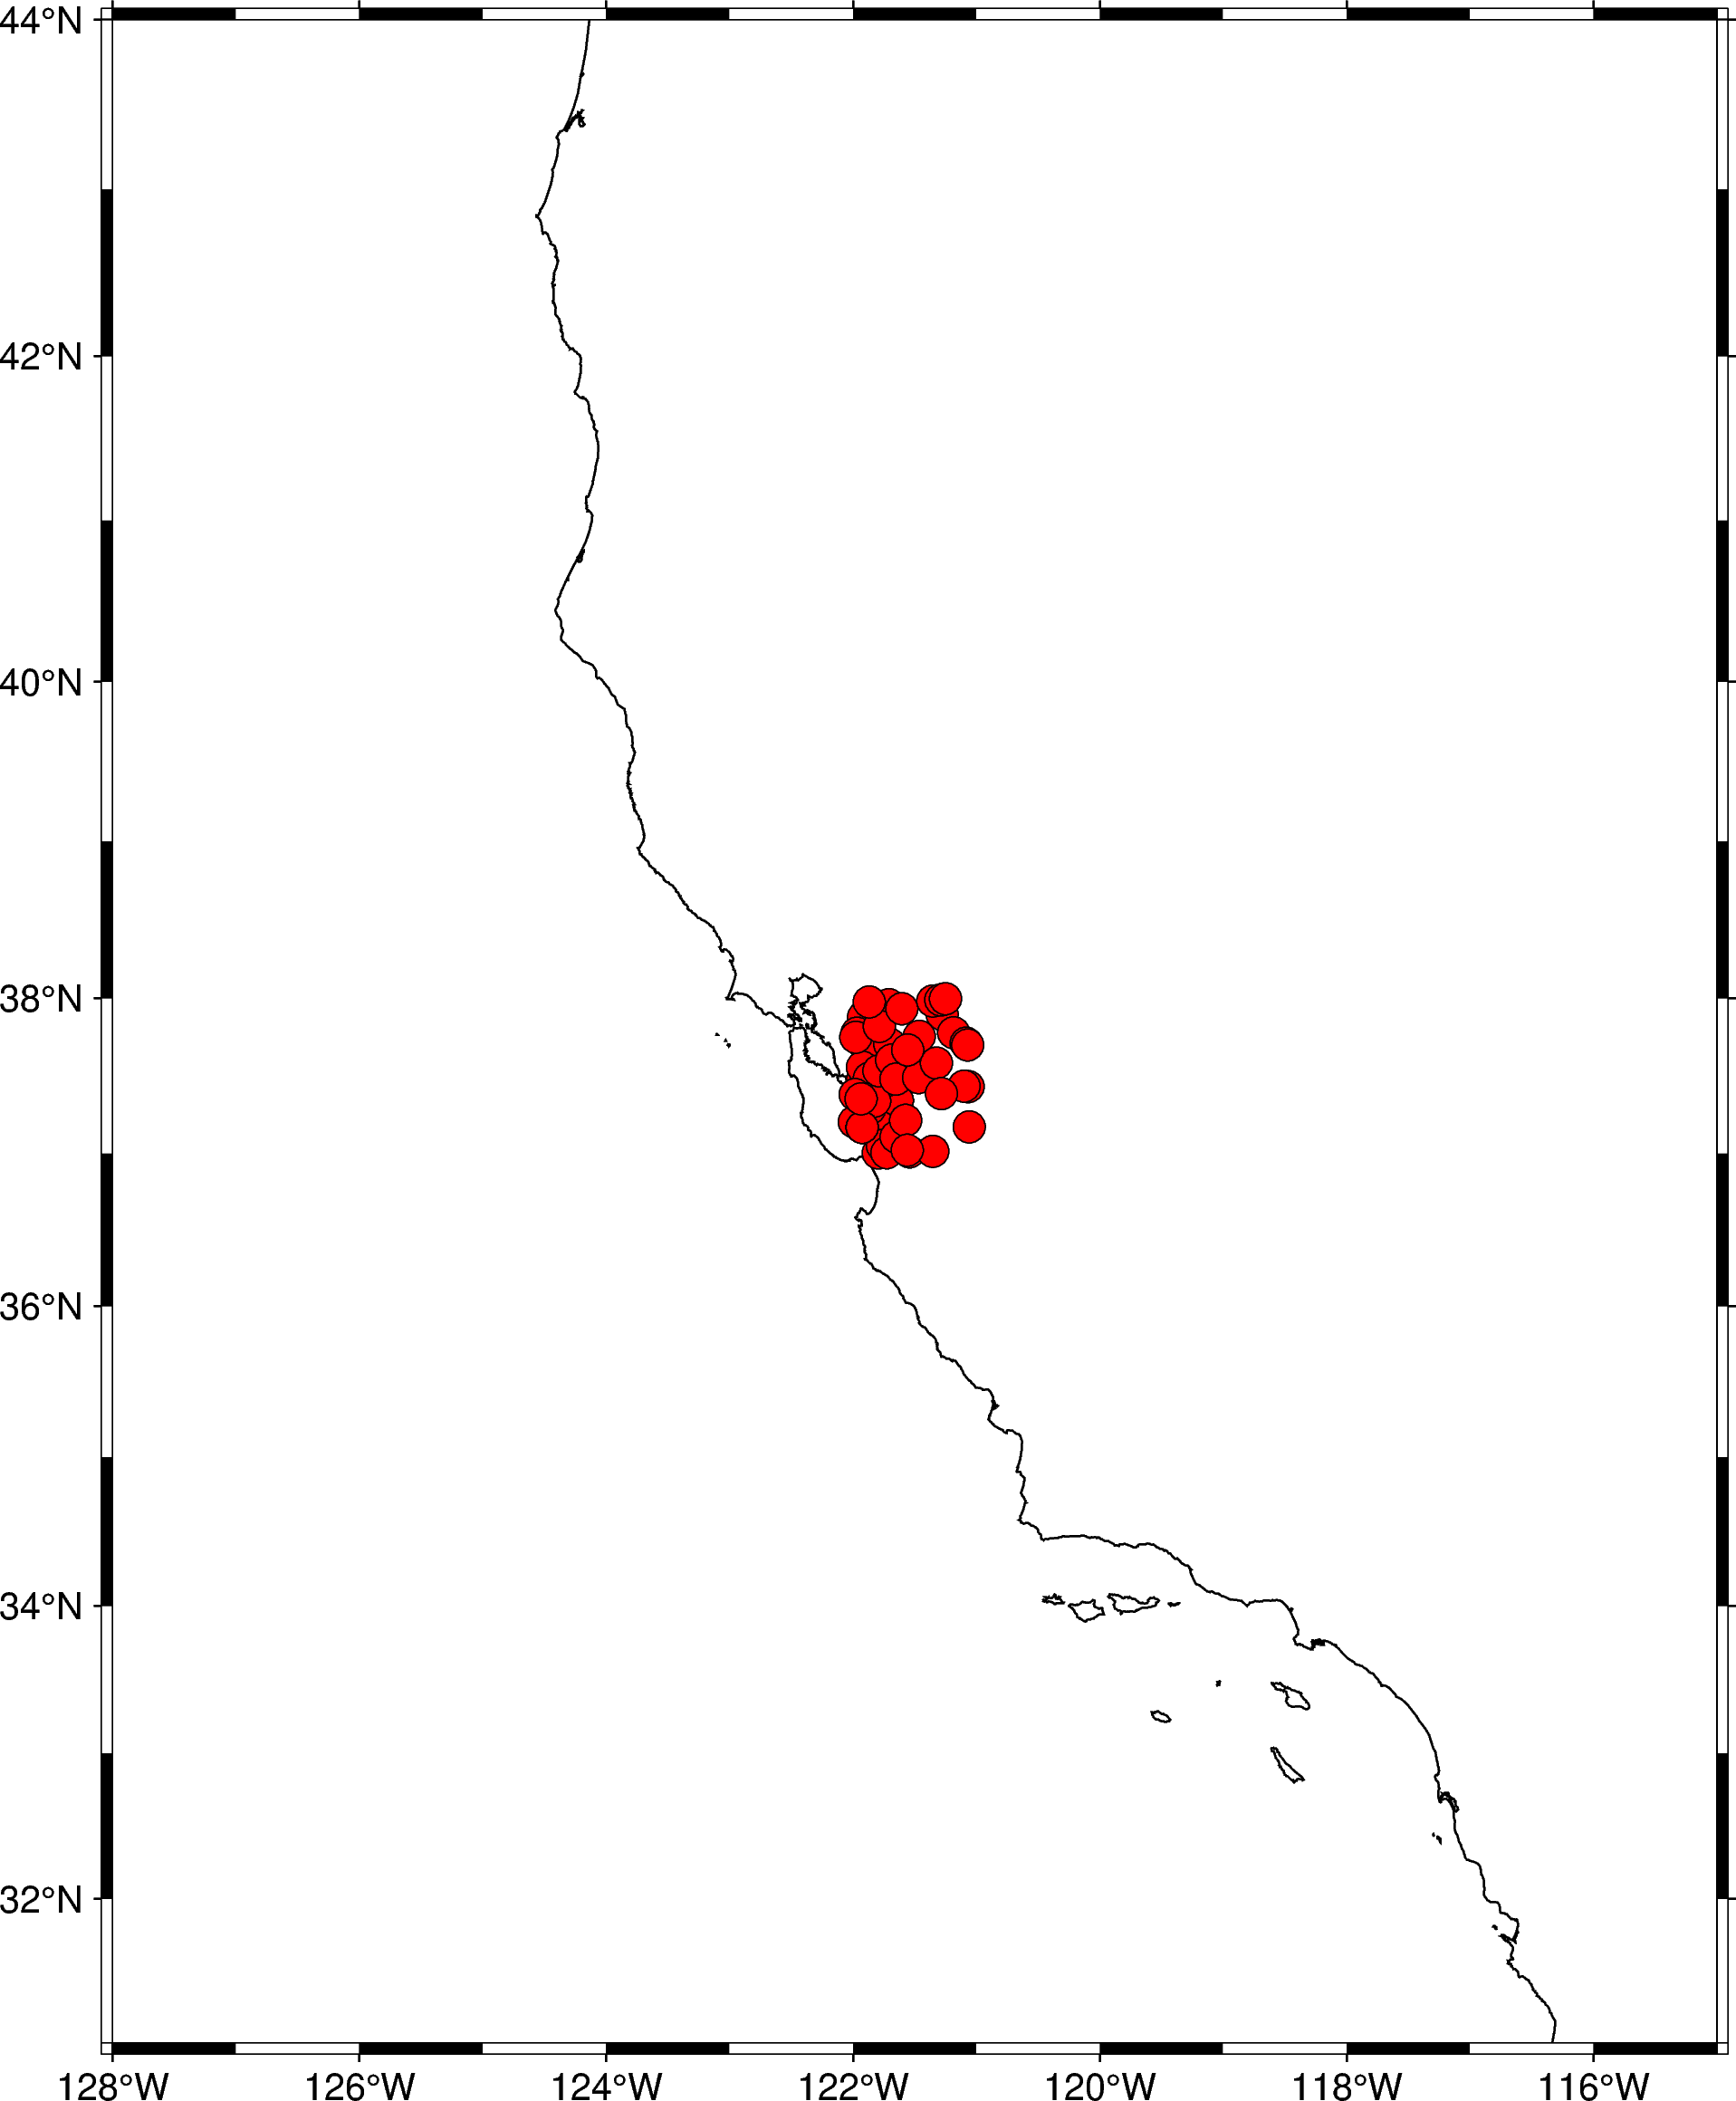

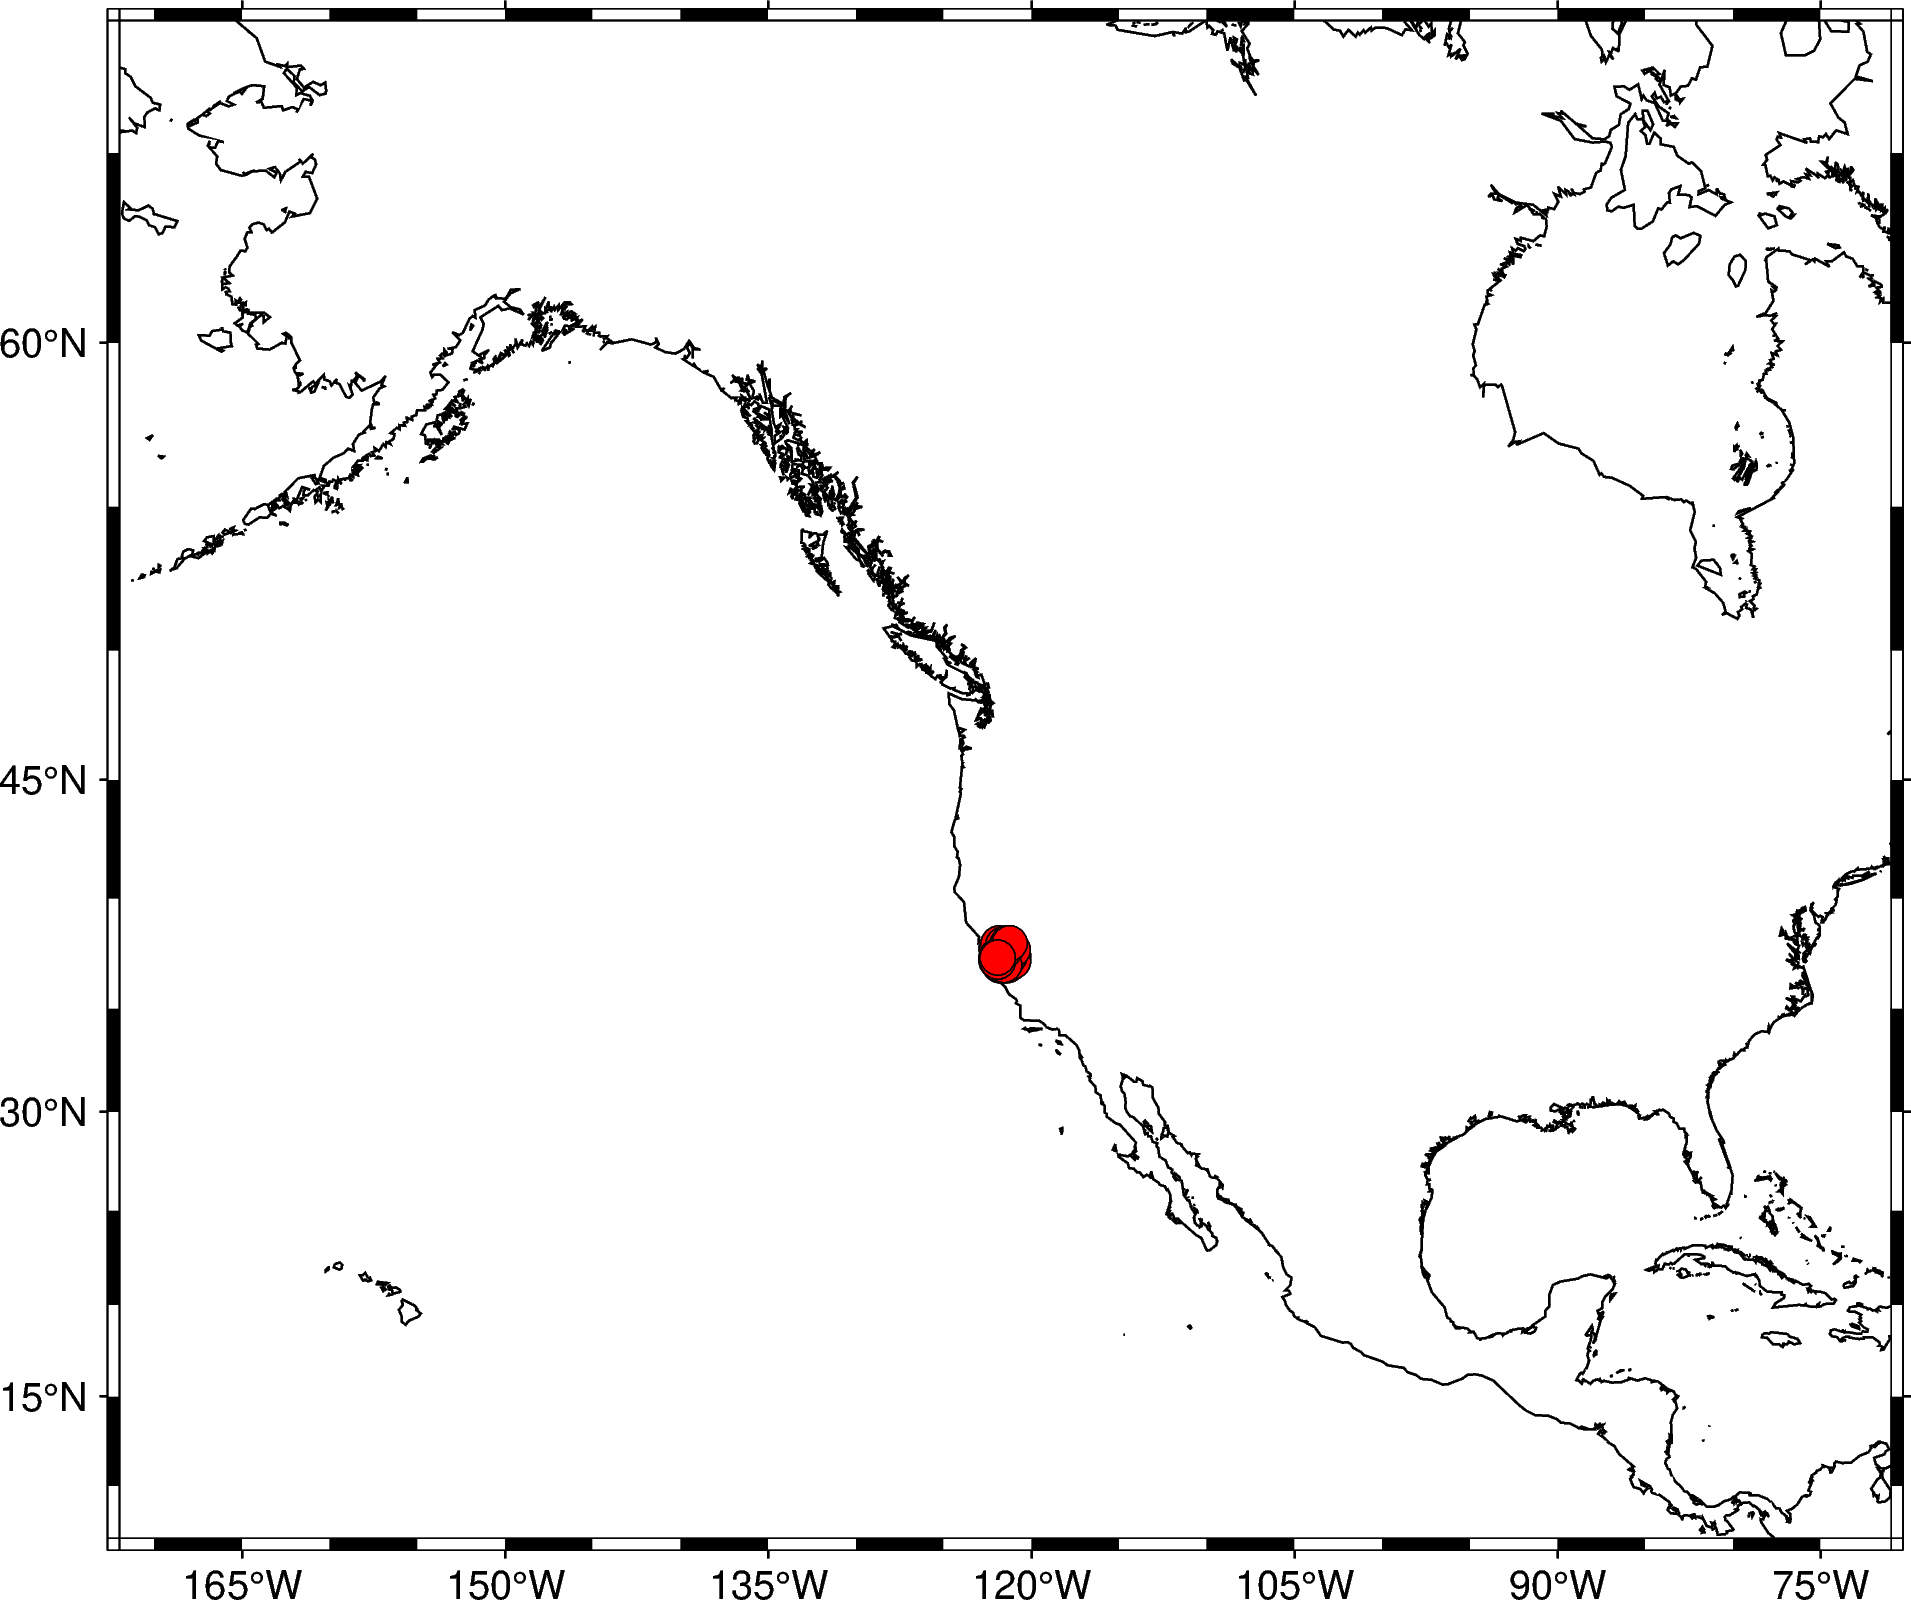

In [9]:
import pygmt
region = [
    lon_min-6,
    lon_max+6,
    lat_min-6,
    lat_max+6,
]

fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(shorelines="1/0.5p,black")
fig.plot(x=filtered_data_pd[25], y=filtered_data_pd[24], style="c0.3c", fill="red", pen="black")
fig.show()

region = [
    lon_min-50,
    lon_max+50,
    lat_min-30,
    lat_max+30,
]

fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(shorelines="1/0.5p,black")
fig.plot(x=filtered_data_pd[25], y=filtered_data_pd[24], style="c0.3c", fill="red", pen="black")
fig.show()

In [150]:
# import os
# import numpy as np

# def load_data_to_matrix(folder_path):
#     """
#     Reads data from all text files in the specified folder.
#     Returns a 3D NumPy array with data from each file.
#     """
#     all_data = []

#     # Iterate over files in the folder
#     for filename in os.listdir(folder_path):
#         if filename.endswith('.tenv3'):
#             file_path = os.path.join(folder_path, filename)
#             data = np.genfromtxt(file_path, delim_white='')
#             data= data[~np.isnan(data).any(axis=1)]
#             all_data.append(data)

#     # Convert the list of 2D arrays to a 3D array
    

#     return all_data

# if __name__ == "__main__":
#     folder_path = 'DATA'  # Specify the path to your data folder
#     data_matrix = load_data_to_matrix(folder_path)

#     print("Shape of data matrix:", len(data_matrix))


Shape of data matrix: 55


In [155]:
# import os
# import numpy as np
# import pandas as pd

# def load_data_to_matrix(folder_path):
#     """
#     Reads data from all text files in the specified folder.
#     Returns a 3D NumPy array with data from each file.
#     """
#     all_data = []

#     # Iterate over files in the folder
#     for filename in os.listdir(folder_path):
#         if filename.endswith('.tenv3'):
#             file_path = os.path.join(folder_path, filename)
#             df = pd.read_csv(file_path, delim_whitespace=True, header=None)
#             data = df.values
#             all_data.append(data)


#     return data_matrix

# if __name__ == "__main__":
#     folder_path = 'data'  # Specify the path to your data folder
#     data_matrix = load_data_to_matrix(folder_path)

#     print("Shape of data matrix:", len(data_matrix))


/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_29848/910639216.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_29848/910639216.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_29848/910639216.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_29848/910639216.py:16: FutureWarning: The 'delim_whitespace' keyword in

Shape of data matrix: 55


/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_29848/910639216.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_29848/910639216.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


In [158]:
df = pd.read_csv('DATA/P256.tenv3', delim_whitespace=True, header=None)

/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_29848/2748067985.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('DATA/P256.tenv3', delim_whitespace=True, header=None)


In [159]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,site,YYMMMDD,yyyy.yyyy,__MJD,week,d,reflon,_e0(m),__east(m),____n0(m),...,_ant(m),sig_e(m),sig_n(m),sig_u(m),__corr_en,__corr_eu,__corr_nu,_latitude(deg),_longitude(deg),__height(m)
1,P256,05MAR17,2005.2074,53446,1314,4,-121.6,-425,-0.395981,4199946,...,0.0083,0.000693,0.000893,0.002823,0.024913,-0.047469,-0.133981,37.9319643245,-121.6048387991,-30.68921
2,P256,05MAR18,2005.2101,53447,1314,5,-121.6,-425,-0.395800,4199946,...,0.0083,0.000673,0.000863,0.002738,0.037376,-0.046806,-0.145961,37.9319643168,-121.6048387970,-30.68493
3,P256,05MAR19,2005.2129,53448,1314,6,-121.6,-425,-0.397468,4199946,...,0.0083,0.000671,0.000870,0.002725,0.003933,-0.041059,-0.094409,37.9319643034,-121.6048388160,-30.68847
4,P256,05MAR20,2005.2156,53449,1315,0,-121.6,-425,-0.396882,4199946,...,0.0083,0.000683,0.000888,0.002857,0.022876,-0.030094,-0.109712,37.9319643364,-121.6048388094,-30.68600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6708,P256,24JAN28,2024.0739,60337,2299,0,-121.6,-425,-0.828334,4199946,...,0.0083,0.000654,0.000797,0.002586,0.019556,-0.013083,-0.144138,37.9319638508,-121.6048437170,-30.71383
6709,P256,24JAN30,2024.0794,60339,2299,2,-121.6,-425,-0.826335,4199946,...,0.0083,0.000648,0.000795,0.002568,0.017704,-0.000634,-0.141710,37.9319638353,-121.6048436943,-30.71354
6710,P256,24JAN31,2024.0821,60340,2299,3,-121.6,-425,-0.827259,4199946,...,0.0083,0.000674,0.000819,0.002733,0.018084,-0.004665,-0.167990,37.9319638483,-121.6048437048,-30.70960
6711,P256,24FEB02,2024.0876,60342,2299,5,-121.6,-425,-0.829025,4199946,...,0.0083,0.000666,0.000818,0.002699,0.000084,0.020359,-0.135679,37.9319638355,-121.6048437249,-30.70586


In [5]:
import os
import pandas as pd

def load_data_to_dataframe(folder_path):
    """
    Reads data from all text files in the specified folder.
    Returns a list of DataFrames, each containing data from one file.
    """
    all_dataframes = []

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.tenv3'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, delim_whitespace=True, header=0)
            all_dataframes.append(df)

    return all_dataframes

if __name__ == "__main__":
    folder_path = 'DATA'  # Specify the path to your data folder
    dataframes_list = load_data_to_dataframe(folder_path)

   


/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_82397/3472138369.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=0)
/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_82397/3472138369.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=0)
/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_82397/3472138369.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=0)
/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_82397/3472138369.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.r

In [42]:
 # Example: Accessing the first DataFrame in the list
P215_df = dataframes_list[0]
P215 = np.array(P215_df)
print("First DataFrame shape:", P215_df)
print(P215.dtype)

First DataFrame shape:       site  YYMMMDD  yyyy.yyyy  __MJD  week  d  reflon  _e0(m)  __east(m)  \
0     P215  07APR07  2007.2635  54197  1421  6  -121.8    3295   0.837826   
1     P215  07APR08  2007.2663  54198  1422  0  -121.8    3295   0.839444   
2     P215  07APR09  2007.2690  54199  1422  1  -121.8    3295   0.840070   
3     P215  07APR10  2007.2717  54200  1422  2  -121.8    3295   0.837549   
4     P215  07APR11  2007.2745  54201  1422  3  -121.8    3295   0.837704   
...    ...      ...        ...    ...   ... ..     ...     ...        ...   
5958  P215  24JAN19  2024.0493  60328  2297  5  -121.8    3295   0.257700   
5959  P215  24JAN27  2024.0712  60336  2298  6  -121.8    3295   0.259045   
5960  P215  24JAN28  2024.0739  60337  2299  0  -121.8    3295   0.256336   
5961  P215  24JAN30  2024.0794  60339  2299  2  -121.8    3295   0.258069   
5962  P215  24JAN31  2024.0821  60340  2299  3  -121.8    3295   0.256890   

      ____n0(m)  ...  _ant(m)  sig_e(m)  sig_n(m)  s

In [44]:
def pick_obs_and_time(data):
    array = data  # Convert input data to float64
    time= array[:,2].astype(np.float64) 
    east = array[:,8].astype(np.float64)*1e3 #mm
    north = array[:,10].astype(np.float64)*1e3 #mm
    up = array[:,12].astype(np.float64)*1e3 #mm
    east_sigma= array[:,14].astype(np.float64)*1e3 #mm
    north_sigma= array[:,15].astype(np.float64)*1e3#mm
    up_sigma= array[:,16].astype(np.float64)*1e3 #mm
    Q_yy_east= np.diag(east_sigma*east_sigma)
    Q_yy_north= np.diag(north_sigma*north_sigma)
    Q_yy_up= np.diag(up_sigma*up_sigma)
    print(Q_yy_east.dtype)
    return time, east, north, up , Q_yy_east, Q_yy_north, Q_yy_up

timeP215, eastP215, northP215, upP215, Q_yy_east, Q_yy_north, Q_yy_up  = pick_obs_and_time(P215)
print(eastP215.dtype)

float64
float64


In [188]:
eastP215.size

5963

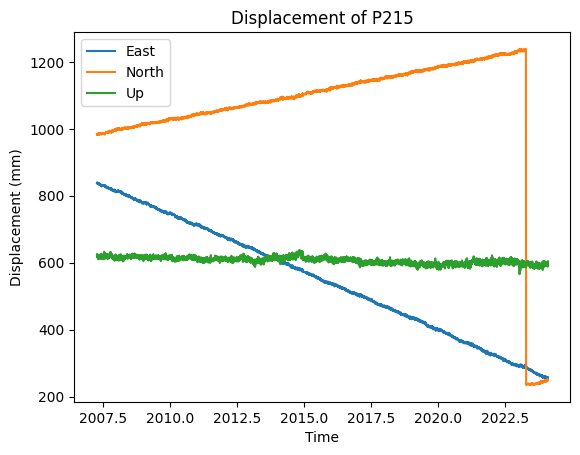

In [30]:
plt.plot(timeP215, eastP215, label='East')
plt.plot(timeP215, northP215, label='North')
plt.plot(timeP215, upP215, label='Up')
plt.xlabel('Time')
plt.ylabel('Displacement (mm)')
plt.title('Displacement of P215')
plt.legend()

In [9]:

#Construct the design matrix A0​, print the first 5 rows
A_east= np.ones((timeP215.size,2))
A_east[:,1]=timeP215

A_north= np.ones((timeP215.size,2))
A_north[:,1]=timeP215

A_up= np.ones((timeP215.size,1))


In [45]:
def A0_model(data):
    #simple model y= a0 + a1t
    time, east, north, up , east_sigma, north_sigma, up_sigma = pick_obs_and_time(data)
    A0= np.ones((time.size,2))
    A0[:,1]=time
    return A0

A0= A0_model(P215)   


float64


In [32]:
def BLUE(A,y,Q_yy):
    """ 
    Function to calculate the Best Linear Unbiased Estimator  
    """

    # Add your code here
    inv_Q_yy= np.linalg.inv(Q_yy)
    Q_x_hat = np.linalg.inv(A.T @ inv_Q_yy @ A)
    x_hat = np.linalg.solve(A.T @ inv_Q_yy @ A, A.T @ inv_Q_yy @ y)

    return x_hat, Q_x_hat

In [48]:
type(Q_yy_east)
print(Q_yy_east.dtype)
x_hat_e, Q_x_hat_e=BLUE(A0,eastP215,Q_yy_east) #timeP215, eastP215, northP215, upP215, Q_yy_east, Q_yy_north, Q_yy_up 
x_hat_n, Q_x_hat_n=BLUE(A0,northP215,Q_yy_north)
x_hat_u, Q_x_hat_u=BLUE(A0,upP215,Q_yy_up)
y_hat_e= A0 @ x_hat_e
y_hat_n= A0 @ x_hat_n
y_hat_u= A0 @ x_hat_u

float64


I probably because it is a huge matrix use the constrained matrix B

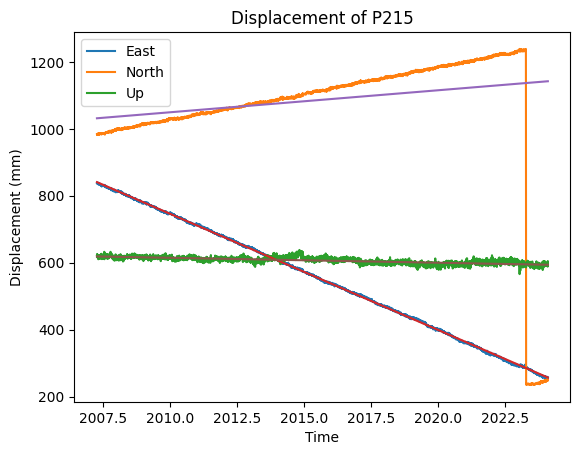

In [49]:
plt.plot(timeP215, eastP215, label='East')
plt.plot(timeP215, northP215, label='North')
plt.plot(timeP215, upP215, label='Up')
plt.plot(timeP215, y_hat_e)
plt.plot(timeP215, y_hat_n)
plt.plot(timeP215, y_hat_u)
plt.xlabel('Time')
plt.ylabel('Displacement (mm)')
plt.title('Displacement of P215')
plt.legend()